In [1]:
from typing import List, Callable
import numpy as np
import numpy.random as random
import math
import matplotlib.pyplot as plt

Vector = List[float]

In [2]:
# dot product dot() is the sum of their componentwise products
# first multiply the vectors elementwise, then add each element together
# i.e. [1,2,3], [4,5,6] == 32 because 1*4 + 2*5 + 3*6 == 32

def dot(v: Vector, w: Vector) -> Vector:
    return sum(v_i* w_i for v_i, w_i in zip(v, w))
assert dot([1,2,3], [4,5,6]) == 32  # or 1*4 + 2*5 + 3*6

In [3]:
def sum_of_squares(v: Vector) -> float:
    """returns the sum of the squares of each element in a vector"""
    return dot(v,v)
assert sum_of_squares([1,2,3]) == 14 # or 1*1 + 2*2 + 3*3

In [4]:
thing = random.randint(100, size=(10,10))
thing

array([[84, 76, 75, 90, 25, 85, 64, 71,  1, 10],
       [89, 98, 92, 35, 82, 49,  2, 48, 99, 91],
       [87, 21, 39, 53, 46, 79, 48, 21, 26, 61],
       [45, 74, 65,  0, 88, 37, 60, 30, 65, 47],
       [ 2,  3, 12,  3, 59, 24, 99, 79, 30, 16],
       [40, 35, 56, 13, 21, 37,  7, 15, 75, 99],
       [84, 62, 40, 18, 12,  9, 94, 85,  8, 83],
       [90, 12, 11, 90, 50, 83,  5, 45, 27, 30],
       [70, 15, 53, 77, 67, 82, 79, 22, 72, 49],
       [45, 43, 83,  3, 25, 90, 93, 20, 43, 61]])

In [5]:
thing2 = sum_of_squares(thing)
thing2

array([48256, 28593, 34534, 26674, 28889, 40975, 43605, 25286, 29054,
       38279])

In [6]:
for thing in thing2:
    print(round(math.sqrt(thing), 2))

219.67
169.09
185.83
163.32
169.97
202.42
208.82
159.02
170.45
195.65


In [7]:
def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

In [8]:
def square(x):
    return x * x

In [9]:
square(100)

10000

In [10]:
def derivative(x):
    return 2 * x

In [11]:
derivative(100)

200

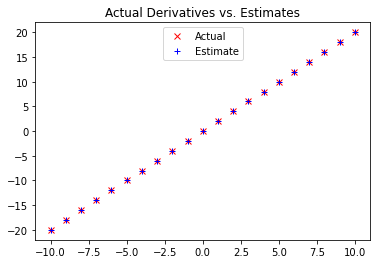

In [12]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

plt.title('Actual Derivatives vs. Estimates')
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [13]:
def partial_difference_quotient(f, v, i, h):
    """
    Returns the i-th partial difference quotient of f at v
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [14]:
def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [15]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), 'Vectors must be of same length'
    return[v_i - w_i for v_i, w_i in zip(v, w)]

In [16]:
def sum_of_squares(v: Vector) -> float:
    """returns the sum of the squares of each element in a vector"""
    return dot(v,v)
assert sum_of_squares([1,2,3]) == 14 # or 1*1 + 2*2 + 3*3

In [17]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + (v_2 - w_2) ** 2 + etc"""
    return sum_of_squares(subtract(v, w))

In [18]:
def distance(v: Vector, w: Vector) -> Vector:
    return math.sqrt(squared_distance(v,w))

In [19]:
# adding two vectors together

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), 'Vectors must be of same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [20]:
def vector_multiply(c: float, v:Vector) -> Vector:
    """Multiplies every element in a vector by c i.e user input"""
    return [c * v_i for v_i in v]

In [21]:
def gradient_step(v, gradient, step_size):
    """
    Moves 'step_size' in the 'gradient' direction from 'v'
    """
    assert len(v) == len(gradient)
    step = vector_multiply(step_size, gradient)
    return add(v, step)

In [22]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [23]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
v

[-8.634879308168564, 5.5535896047043565, -8.672400588474936]

In [24]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative graient step
    print(epoch, v)
assert distance(v, [0,0,0]) < 0.001   # v should be close to 0

0 [-8.462181722005193, 5.442517812610269, -8.498952576705438]
1 [-8.292938087565089, 5.333667456358064, -8.32897352517133]
2 [-8.127079325813787, 5.226994107230903, -8.162394054667903]
3 [-7.964537739297511, 5.122454225086285, -7.999146173574545]
4 [-7.805246984511561, 5.020005140584559, -7.839163250103054]
5 [-7.649142044821329, 4.919605037772868, -7.682379985100993]
6 [-7.496159203924902, 4.82121293701741, -7.528732385398973]
7 [-7.346236019846404, 4.724788678277062, -7.3781577376909935]
8 [-7.199311299449476, 4.630292904711521, -7.230594582937174]
9 [-7.055325073460486, 4.5376870466172905, -7.0859826912784305]
10 [-6.9142185719912765, 4.4469333056849445, -6.9442630374528616]
11 [-6.775934200551451, 4.357994639571245, -6.805377776703804]
12 [-6.640415516540422, 4.270834746779821, -6.669270221169728]
13 [-6.507607206209613, 4.185418051844224, -6.535884816746333]
14 [-6.377455062085421, 4.10170969080734, -6.405167120411407]
15 [-6.249905960843712, 4.019675496991193, -6.277063778003178]

245 [-0.059961279565351945, 0.03856456205055391, -0.06022183028040033]
246 [-0.05876205397404491, 0.03779327080954283, -0.05901739367479233]
247 [-0.05758681289456401, 0.03703740539335198, -0.057837045801296484]
248 [-0.05643507663667273, 0.03629665728548494, -0.05668030488527055]
249 [-0.05530637510393927, 0.03557072413977524, -0.055546698787565144]
250 [-0.054200247601860485, 0.03485930965697973, -0.05443576481181384]
251 [-0.05311624264982327, 0.034162123463840136, -0.05334704951557757]
252 [-0.052053917796826804, 0.03347888099456333, -0.05228010852526602]
253 [-0.051012839440890266, 0.03280930337467206, -0.0512345063547607]
254 [-0.04999258265207246, 0.03215311730717862, -0.05020981622766549]
255 [-0.04899273099903101, 0.031510054961035046, -0.04920561990311218]
256 [-0.04801287637905039, 0.030879853861814344, -0.048221507505049936]
257 [-0.047052618851469385, 0.030262256784578057, -0.04725707735494894]
258 [-0.04611156647444, 0.029657011648886497, -0.04631193580784996]
259 [-0.045

489 [-0.00043354418050043974, 0.0002788373025352672, -0.0004354280670194281]
490 [-0.00042487329689043095, 0.0002732605564845619, -0.00042671950567903954]
491 [-0.0004163758309526223, 0.00026779534535487066, -0.00041818511556545874]
492 [-0.00040804831433356985, 0.00026243943844777326, -0.0004098214132541496]
493 [-0.00039988734804689846, 0.0002571906496788178, -0.0004016249849890666]
494 [-0.0003918896010859605, 0.00025204683668524145, -0.0003935924852892853]
495 [-0.0003840518090642413, 0.00024700589995153664, -0.00038572063558349955]
496 [-0.0003763707728829564, 0.00024206578195250591, -0.00037800622287182957]
497 [-0.0003688433574252973, 0.0002372244663134558, -0.000370446098414393]
498 [-0.00036146649027679134, 0.0002324799769871867, -0.0003630371764461051]
499 [-0.0003542371604712555, 0.00022783037744744295, -0.000355776432917183]
500 [-0.0003471524172618304, 0.0002232737698984941, -0.00034866090425883934]
501 [-0.0003402093689165938, 0.00021880829450052422, -0.000341687686173662

740 [-2.721312144715248e-06, 1.750233014113986e-06, -2.7331371062623526e-06]
741 [-2.666885901820943e-06, 1.7152283538317063e-06, -2.6784743641371054e-06]
742 [-2.613548183784524e-06, 1.680923786755072e-06, -2.624904876854363e-06]
743 [-2.5612772201088335e-06, 1.6473053110199707e-06, -2.572406779317276e-06]
744 [-2.5100516757066568e-06, 1.6143592047995713e-06, -2.5209586437309302e-06]
745 [-2.4598506421925236e-06, 1.5820720207035799e-06, -2.4705394708563115e-06]
746 [-2.4106536293486734e-06, 1.5504305802895082e-06, -2.421128681439185e-06]
747 [-2.3624405567617e-06, 1.519421968683718e-06, -2.3727061078104013e-06]
748 [-2.315191745626466e-06, 1.4890335293100437e-06, -2.3252519856541934e-06]
749 [-2.2688879107139365e-06, 1.4592528587238428e-06, -2.2787469459411093e-06]
750 [-2.223510152499658e-06, 1.430067801549366e-06, -2.233172007022287e-06]
751 [-2.1790399494496646e-06, 1.4014664455183786e-06, -2.188508566881841e-06]
752 [-2.135459150460671e-06, 1.373437116608011e-06, -2.14473839554420

927 [-6.223784036353346e-08, 4.0028749786368424e-08, -6.250828345493062e-08]
928 [-6.09930835562628e-08, 3.9228174790641055e-08, -6.125811778583202e-08]
929 [-5.977322188513754e-08, 3.8443611294828235e-08, -6.003295543011538e-08]
930 [-5.8577757447434794e-08, 3.767473906893167e-08, -5.883229632151307e-08]
931 [-5.7406202298486095e-08, 3.6921244287553036e-08, -5.7655650395082806e-08]
932 [-5.6258078252516375e-08, 3.6182819401801976e-08, -5.650253738718115e-08]
933 [-5.513291668746605e-08, 3.5459163013765936e-08, -5.5372486639437524e-08]
934 [-5.403025835371673e-08, 3.474997975349062e-08, -5.4265036906648775e-08]
935 [-5.294965318664239e-08, 3.405498015842081e-08, -5.31797361685158e-08]
936 [-5.1890660122909545e-08, 3.337388055525239e-08, -5.2116141445145483e-08]
937 [-5.085284692045136e-08, 3.2706402944147344e-08, -5.1073818616242574e-08]
938 [-4.983578998204233e-08, 3.20522748852644e-08, -5.005234224391772e-08]
939 [-4.883907418240148e-08, 3.141122938755911e-08, -4.905129539903937e-08]

In [25]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
inputs

[(-50, -995),
 (-49, -975),
 (-48, -955),
 (-47, -935),
 (-46, -915),
 (-45, -895),
 (-44, -875),
 (-43, -855),
 (-42, -835),
 (-41, -815),
 (-40, -795),
 (-39, -775),
 (-38, -755),
 (-37, -735),
 (-36, -715),
 (-35, -695),
 (-34, -675),
 (-33, -655),
 (-32, -635),
 (-31, -615),
 (-30, -595),
 (-29, -575),
 (-28, -555),
 (-27, -535),
 (-26, -515),
 (-25, -495),
 (-24, -475),
 (-23, -455),
 (-22, -435),
 (-21, -415),
 (-20, -395),
 (-19, -375),
 (-18, -355),
 (-17, -335),
 (-16, -315),
 (-15, -295),
 (-14, -275),
 (-13, -255),
 (-12, -235),
 (-11, -215),
 (-10, -195),
 (-9, -175),
 (-8, -155),
 (-7, -135),
 (-6, -115),
 (-5, -95),
 (-4, -75),
 (-3, -55),
 (-2, -35),
 (-1, -15),
 (0, 5),
 (1, 25),
 (2, 45),
 (3, 65),
 (4, 85),
 (5, 105),
 (6, 125),
 (7, 145),
 (8, 165),
 (9, 185),
 (10, 205),
 (11, 225),
 (12, 245),
 (13, 265),
 (14, 285),
 (15, 305),
 (16, 325),
 (17, 345),
 (18, 365),
 (19, 385),
 (20, 405),
 (21, 425),
 (22, 445),
 (23, 465),
 (24, 485),
 (25, 505),
 (26, 525),
 (27, 

In [26]:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [27]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    #Check that vectors is not empty
    assert vectors, "No vectors provided!"
    
    #Check that the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Different Sizes"
    
    #The i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
assert vector_sum([[1,2],[3,4],[5,6], [7,8]]) == [16,20]

In [28]:
def vector_mean(*vectors: List[Vector]) -> Vector:
    """ Computes the element-wise average"""
    
    # number of vectors to average by
    n = len(*vectors)
    return vector_multiply(1/n, vector_sum(*vectors))

In [29]:
theta = [random.uniform(-1, 1), random.uniform(-1,1)]
learning_rate = 0.001
for epoch in range(5000):
    #compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

0 [33.89059850128425, 0.07307712586968551]
1 [10.730043876769265, 0.09682157011923029]
2 [26.17815755576501, 0.09735797085576114]
3 [15.874266268275589, 0.11334141246981463]
4 [22.74697774047265, 0.1189889959131506]
5 [18.162884836100655, 0.13149799566179693]
6 [21.220487312316525, 0.139397884506574]
7 [19.181074360569383, 0.15033957604987738]
8 [20.54137374107627, 0.15921997125834703]
9 [19.634062934673388, 0.16944290505690657]
10 [20.239249465477908, 0.1787380821814661]
11 [19.83559934460842, 0.18861985548258114]
12 [20.10484385700167, 0.19807821511622442]
13 [19.925267225595004, 0.20778690254299367]
14 [20.045054547430674, 0.21729659596350265]
15 [19.965165913459703, 0.22690705731900634]
16 [20.018461242779697, 0.23641840911782808]
17 [19.98292276947506, 0.2459640335423721]
18 [20.006636476793677, 0.25545502824476246]
19 [19.990828925006863, 0.26495075466506657]
20 [20.00138205777509, 0.2744116820807433]
21 [19.994352579146096, 0.28386424077435685]
22 [19.999050693950327, 0.29329086

233 [19.9981468856433, 1.9145634831109068]
234 [19.99815059075903, 1.9207325030303284]
235 [19.998154288466758, 1.9268891886150268]
236 [19.998157978781286, 1.9330335645262635]
237 [19.998161661717408, 1.9391656553759924]
238 [19.998165337289866, 1.945285485726958]
239 [19.998169005513386, 1.9513930800927939]
240 [19.998172666402663, 1.9574884629381217]
241 [19.998176319972362, 1.963571658678648]
242 [19.998179966237114, 1.969642691681263]
243 [19.998183605211526, 1.9757015862641376]
244 [19.998187236910177, 1.981748366696821]
245 [19.99819086134761, 1.9877830572003374]
246 [19.998194478538345, 1.9938056819472845]
247 [19.99819808849687, 1.9998162650619282]
248 [19.99820169123765, 2.0058148306203014]
249 [19.998205286775107, 2.0118014026502986]
250 [19.99820887512365, 2.0177760051317732]
251 [19.998212456297654, 2.0237386619966333]
252 [19.99821603031146, 2.0296893971289376]
253 [19.998219597179386, 2.0356282343649914]
254 [19.998223156915714, 2.041555197493441]
255 [19.998226709534713

433 [19.998758168276034, 2.9323494337509297]
434 [19.998760651193635, 2.936483493051704]
435 [19.998763129146898, 2.940609286716794]
436 [19.998765602145735, 2.9447268312725075]
437 [19.998768070200068, 2.948836143212108]
438 [19.998770533319767, 2.952937238995884]
439 [19.99877299151471, 2.957030135051212]
440 [19.99877544479474, 2.9611148477726243]
441 [19.99877789316968, 2.9651913935218737]
442 [19.998780336649343, 2.9692597886279994]
443 [19.998782775243516, 2.9733200493873926]
444 [19.998785208961962, 2.977372192063861]
445 [19.998787637814434, 2.9814162328886953]
446 [19.99879006181066, 2.9854521880607323]
447 [19.99879248096035, 2.9894800737464213]
448 [19.998794895273193, 2.993499906079889]
449 [19.99879730475886, 2.997511701163002]
450 [19.998799709427004, 3.001515475065435]
451 [19.998802109287254, 3.005511243824731]
452 [19.998804504349227, 3.0094990234463688]
453 [19.99880689462251, 3.0134788299038253]
454 [19.99880928011669, 3.01745067913864]
455 [19.99881166084131, 3.0214

702 [19.9992751491336, 3.7931228720975367]
703 [19.999276598399987, 3.7955359015024754]
704 [19.99927804476871, 3.7979441062978703]
705 [19.999279488245566, 3.800347496130043]
706 [19.99928092883634, 3.8027460806260285]
707 [19.99928236654679, 3.8051398693936127]
708 [19.999283801382685, 3.807528872021372]
709 [19.99928523334977, 3.809913098078712]
710 [19.99928666245378, 3.8122925571159043]
711 [19.999288088700446, 3.814667258664126]
712 [19.999289512095466, 3.8170372122354985]
713 [19.99929093264456, 3.819402427323123]
714 [19.999292350353404, 3.821762913401121]
715 [19.99929376522768, 3.824118679924672]
716 [19.999295177273062, 3.82646973633005]
717 [19.9992965864952, 3.828816092034663]
718 [19.999297992899738, 3.831157756437089]
719 [19.99929939649231, 3.8334947389171146]
720 [19.999300797278543, 3.8358270488357724]
721 [19.999302195264047, 3.8381546955353794]
722 [19.999303590454417, 3.840477688339573]
723 [19.999304982855243, 3.8427960365533482]
724 [19.999306372472105, 3.8451097

893 [19.99950542521826, 4.176532691359407]
894 [19.99950641407078, 4.178179131401906]
895 [19.999507400946193, 4.179822279553173]
896 [19.999508385848443, 4.181462142395013]
897 [19.999509368781485, 4.1830987264960715]
898 [19.999510349749247, 4.184732038411861]
899 [19.999511328755663, 4.186362084684786]
900 [19.999512305804657, 4.187988871844173]
901 [19.99951328090014, 4.189612406406289]
902 [19.999514254046012, 4.191232694874377]
903 [19.999515225246185, 4.192849743738674]
904 [19.999516194504533, 4.194463559476443]
905 [19.999517161824954, 4.196074148551994]
906 [19.999518127211307, 4.197681517416715]
907 [19.999519090667476, 4.199285672509093]
908 [19.9995200521973, 4.2008866202547415]
909 [19.999521011804653, 4.202484367066429]
910 [19.99952196949336, 4.2040789193441]
911 [19.99952292526727, 4.205670283474905]
912 [19.999523879130205, 4.207258465833223]
913 [19.999524831085985, 4.2088434727806865]
914 [19.999525781138427, 4.210425310666211]
915 [19.999526729291336, 4.21200398582

1193 [19.99972868565141, 4.54826144664423]
1194 [19.999729228117154, 4.549164652436593]
1195 [19.999729769498295, 4.550066052359837]
1196 [19.999730309797, 4.550965650024615]
1197 [19.999730849015428, 4.551863449034363]
1198 [19.999731387155744, 4.552759452985309]
1199 [19.999731924220104, 4.553653665466494]
1200 [19.99973246021066, 4.554546090059781]
1201 [19.999732995129552, 4.555436730339872]
1202 [19.99973352897893, 4.556325589874322]
1203 [19.99973406176093, 4.557212672223552]
1204 [19.999734593477683, 4.558097980940866]
1205 [19.999735124131327, 4.558981519572463]
1206 [19.999735653723977, 4.559863291657449]
1207 [19.999736182257767, 4.560743300727858]
1208 [19.999736709734798, 4.561621550308661]
1209 [19.9997372361572, 4.562498043917778]
1210 [19.999737761527065, 4.5633727850660994]
1211 [19.999738285846515, 4.5642457772574945]
1212 [19.99973880911763, 4.565117023988826]
1213 [19.99973933134253, 4.565986528749966]
1214 [19.999739852523284, 4.566854295023809]
1215 [19.99974037266

1381 [19.999813763989398, 4.689916930493566]
1382 [19.999814136349563, 4.690536910396569]
1383 [19.999814507965237, 4.691155650712125]
1384 [19.9998148788379, 4.691773153918666]
1385 [19.99981524896904, 4.692389422489667]
1386 [19.99981561836014, 4.693004458893657]
1387 [19.999815987012678, 4.693618265594229]
1388 [19.99981635492814, 4.694230845050053]
1389 [19.99981672210798, 4.6948421997148815]
1390 [19.999817088553694, 4.69545233203756]
1391 [19.999817454266722, 4.696061244462038]
1392 [19.99981781924856, 4.696668939427381]
1393 [19.99981818350064, 4.697275419367775]
1394 [19.99981854702444, 4.69788068671254]
1395 [19.99981890982141, 4.698484743886139]
1396 [19.999819271893006, 4.699087593308188]
1397 [19.999819633240673, 4.699689237393464]
1398 [19.999819993865867, 4.700289678551918]
1399 [19.99982035377002, 4.700888919188681]
1400 [19.999820712954588, 4.701486961704074]
1401 [19.999821071420993, 4.7020838084936205]
1402 [19.99982142917069, 4.702679461948054]
1403 [19.9998217862050

1640 [19.99988909744653, 4.815347181865601]
1641 [19.99988931918503, 4.815716376599316]
1642 [19.999889540480183, 4.816084833165303]
1643 [19.999889761332884, 4.816452553039452]
1644 [19.999889981744005, 4.816819537694706]
1645 [19.999890201714443, 4.817185788601061]
1646 [19.999890421245066, 4.817551307225574]
1647 [19.999890640336766, 4.817916095032368]
1648 [19.99989085899041, 4.8182801534826405]
1649 [19.99989107720688, 4.8186434840346655]
1650 [19.999891294987048, 4.819006088143803]
1651 [19.999891512331782, 4.819367967262503]
1652 [19.999891729241963, 4.819729122840309]
1653 [19.999891945718453, 4.820089556323871]
1654 [19.999892161762116, 4.820449269156941]
1655 [19.999892377373826, 4.820808262780389]
1656 [19.99989259255444, 4.821166538632202]
1657 [19.99989280730482, 4.821524098147492]
1658 [19.99989302162583, 4.821880942758502]
1659 [19.99989323551833, 4.822237073894611]
1660 [19.99989344898317, 4.82259249298234]
1661 [19.999893662021208, 4.822947201445358]
1662 [19.999893874

1939 [19.99993903907654, 4.8985000258275395]
1940 [19.999939160961773, 4.898702964814961]
1941 [19.99993928260331, 4.898905498046293]
1942 [19.999939404001637, 4.899107626332804]
1943 [19.99993952515724, 4.89930935048414]
1944 [19.999939646070604, 4.899510671308329]
1945 [19.999939766742216, 4.899711589611783]
1946 [19.999939887172555, 4.899912106199302]
1947 [19.999940007362106, 4.9001122218740765]
1948 [19.999940127311348, 4.9003119374376904]
1949 [19.999940247020767, 4.9005112536901265]
1950 [19.99994036649084, 4.900710171429767]
1951 [19.99994048572204, 4.900908691453399]
1952 [19.999940604714855, 4.901106814556214]
1953 [19.99994072346975, 4.901304541531816]
1954 [19.99994084198721, 4.901501873172222]
1955 [19.999940960267704, 4.901698810267865]
1956 [19.99994107831171, 4.901895353607597]
1957 [19.999941196119696, 4.902091503978694]
1958 [19.99994131369214, 4.9022872621668565]
1959 [19.99994143102951, 4.902482628956215]
1960 [19.999941548132274, 4.902677605129332]
1961 [19.9999416

2394 [19.99997547738715, 4.959169834872144]
2395 [19.999975526417643, 4.959251470679787]
2396 [19.999975575350113, 4.959332943264845]
2397 [19.99997562418474, 4.959414252953665]
2398 [19.99997567292173, 4.959495400071942]
2399 [19.999975721561277, 4.95957638494472]
2400 [19.99997577010357, 4.959657207896392]
2401 [19.999975818548815, 4.959737869250702]
2402 [19.99997586689719, 4.959818369330749]
2403 [19.999975915148905, 4.959898708458985]
2404 [19.99997596330414, 4.959978886957216]
2405 [19.999976011363096, 4.960058905146606]
2406 [19.999976059325963, 4.9601387633476755]
2407 [19.99997610719293, 4.960218461880306]
2408 [19.999976154964198, 4.960298001063738]
2409 [19.999976202639942, 4.960377381216575]
2410 [19.999976250220374, 4.960456602656782]
2411 [19.99997629770567, 4.960535665701689]
2412 [19.99997634509602, 4.960614570667991]
2413 [19.999976392391623, 4.960693317871751]
2414 [19.999976439592658, 4.960771907628399]
2415 [19.999976486699325, 4.960850340252735]
2416 [19.9999765337

2640 [19.999985011982446, 4.975044941769154]
2641 [19.99998504194948, 4.975094836897598]
2642 [19.999985071856596, 4.975144632265752]
2643 [19.999985101703917, 4.975194328073077]
2644 [19.99998513149156, 4.975243924518635]
2645 [19.999985161219648, 4.975293421801089]
2646 [19.999985190888296, 4.975342820118707]
2647 [19.999985220497624, 4.975392119669357]
2648 [19.999985250047754, 4.975441320650516]
2649 [19.999985279538798, 4.975490423259263]
2650 [19.99998530897088, 4.975539427692283]
2651 [19.999985338344114, 4.975588334145869]
2652 [19.99998536765862, 4.975637142815922]
2653 [19.999985396914518, 4.975685853897948]
2654 [19.999985426111916, 4.975734467587067]
2655 [19.99998545525094, 4.975782984078005]
2656 [19.999985484331702, 4.9758314035651]
2657 [19.99998551335432, 4.975879726242302]
2658 [19.99998554231891, 4.975927952303172]
2659 [19.99998557122559, 4.9759760819408845]
2660 [19.99998560007447, 4.9760241153482285]
2661 [19.999985628865677, 4.9760720527176066]
2662 [19.999985657

2879 [19.999990710207236, 4.984532489470503]
2880 [19.999990728781246, 4.9845634152017695]
2881 [19.99999074731811, 4.984594279100147]
2882 [19.99999076581792, 4.9846250812892645]
2883 [19.999990784280737, 4.984655821892504]
2884 [19.99999080270664, 4.984686501033]
2885 [19.999990821095704, 4.9847171188336405]
2886 [19.999990839448, 4.984747675417069]
2887 [19.999990857763603, 4.984778170905683]
2888 [19.99999087604258, 4.984808605421635]
2889 [19.99999089428502, 4.984838979086834]
2890 [19.99999091249098, 4.984869292022945]
2891 [19.99999093066054, 4.98489954435139]
2892 [19.99999094879377, 4.984929736193348]
2893 [19.99999096689075, 4.9849598676697555]
2894 [19.99999098495154, 4.984989938901307]
2895 [19.999991002976223, 4.985019950008455]
2896 [19.999991020964867, 4.985049901111415]
2897 [19.999991038917546, 4.985079792330157]
2898 [19.999991056834325, 4.985109623784414]
2899 [19.99999107471529, 4.98513939559368]
2900 [19.999991092560496, 4.985169107877208]
2901 [19.999991110370026,

3117 [19.9999942305149, 4.99039380384716]
3118 [19.99999424205041, 4.99041301046998]
3119 [19.999994253562846, 4.990432178691091]
3120 [19.999994265052273, 4.9904513085872715]
3121 [19.99999427651872, 4.990470400235149]
3122 [19.99999428796225, 4.990489453711198]
3123 [19.99999429938289, 4.990508469091737]
3124 [19.999994310780703, 4.990527446452936]
3125 [19.999994322155725, 4.990546385870811]
3126 [19.999994333508003, 4.990565287421225]
3127 [19.99999434483758, 4.99058415117989]
3128 [19.999994356144512, 4.990602977222368]
3129 [19.999994367428833, 4.990621765624068]
3130 [19.99999437869059, 4.990640516460249]
3131 [19.999994389929835, 4.990659229806019]
3132 [19.999994401146605, 4.990677905736336]
3133 [19.99999441234095, 4.990696544326011]
3134 [19.999994423512913, 4.990715145649699]
3135 [19.999994434662536, 4.990733709781913]
3136 [19.99999444578987, 4.990752236797012]
3137 [19.999994456894953, 4.990770726769208]
3138 [19.999994467977835, 4.990789179772564]
3139 [19.9999944790385

3319 [19.999996149127046, 4.993588294220655]
3320 [19.99999615682648, 4.993601113781341]
3321 [19.99999616451052, 4.993613907710604]
3322 [19.999996172179195, 4.9936266760596935]
3323 [19.999996179832536, 4.993639418879753]
3324 [19.99999618747058, 4.993652136221826]
3325 [19.999996195093345, 4.993664828136852]
3326 [19.999996202700874, 4.993677494675672]
3327 [19.999996210293194, 4.993690135889022]
3328 [19.99999621787033, 4.993702751827537]
3329 [19.99999622543232, 4.993715342541752]
3330 [19.999996232979186, 4.993727908082101]
3331 [19.999996240510967, 4.993740448498916]
3332 [19.999996248027685, 4.99375296384243]
3333 [19.999996255529375, 4.993765454162772]
3334 [19.99999626301607, 4.993777919509975]
3335 [19.99999627048779, 4.993790359933971]
3336 [19.999996277944575, 4.993802775484591]
3337 [19.99999628538645, 4.993815166211566]
3338 [19.99999629281345, 4.993827532164529]
3339 [19.999996300225593, 4.993839873393013]
3340 [19.999996307622922, 4.993852189946453]
3341 [19.9999963150

3543 [19.99999754043115, 4.995904816391351]
3544 [19.999997545348815, 4.995913004299]
3545 [19.99999755025664, 4.9959211758357505]
3546 [19.999997555154657, 4.995929331034335]
3547 [19.99999756004288, 4.995937469927421]
3548 [19.999997564921326, 4.995945592547609]
3549 [19.999997569790022, 4.995953698927435]
3550 [19.999997574648983, 4.99596178909937]
3551 [19.999997579498228, 4.99596986309582]
3552 [19.999997584337777, 4.995977920949127]
3553 [19.999997589167652, 4.995985962691566]
3554 [19.999997593987867, 4.99599398835535]
3555 [19.999997598798448, 4.996001997972627]
3556 [19.999997603599407, 4.99600999157548]
3557 [19.99999760839077, 4.996017969195929]
3558 [19.999997613172553, 4.996025930865928]
3559 [19.99999761794477, 4.996033876617369]
3560 [19.999997622707454, 4.996041806482078]
3561 [19.99999762746061, 4.996049720491822]
3562 [19.999997632204266, 4.996057618678299]
3563 [19.99999763693843, 4.996065501073147]
3564 [19.99999764166314, 4.99607336770794]
3565 [19.999997646378393,

3765 [19.99999842276222, 4.997373898147947]
3766 [19.999998425915745, 4.997379148774413]
3767 [19.999998429062973, 4.99738438890278]
3768 [19.9999984322039, 4.997389618554037]
3769 [19.999998435338554, 4.997394837749133]
3770 [19.999998438466932, 4.997400046508973]
3771 [19.999998441589067, 4.997405244854423]
3772 [19.999998444704946, 4.997410432806303]
3773 [19.99999844781461, 4.997415610385396]
3774 [19.999998450918042, 4.997420777612439]
3775 [19.999998454015277, 4.997425934508133]
3776 [19.99999845710632, 4.997431081093132]
3777 [19.99999846019118, 4.997436217388052]
3778 [19.999998463269872, 4.997441343413467]
3779 [19.999998466342408, 4.99744645918991]
3780 [19.999998469408805, 4.997451564737873]
3781 [19.999998472469066, 4.997456660077806]
3782 [19.99999847552321, 4.99746174523012]
3783 [19.99999847857125, 4.997466820215183]
3784 [19.99999848161319, 4.997471885053324]
3785 [19.999998484649055, 4.99747693976483]
3786 [19.999998487678845, 4.99748198436995]
3787 [19.99999849070258,

3964 [19.99999894092456, 4.998236638750365]
3965 [19.99999894304207, 4.998240164413788]
3966 [19.999998945155355, 4.998243683028003]
3967 [19.999998947264405, 4.998247194607102]
3968 [19.99999894936925, 4.998250699165152]
3969 [19.999998951469877, 4.998254196716191]
3970 [19.99999895356631, 4.998257687274228]
3971 [19.999998955658548, 4.9982611708532465]
3972 [19.9999989577466, 4.998264647467199]
3973 [19.999998959830485, 4.998268117130011]
3974 [19.999998961910197, 4.998271579855581]
3975 [19.999998963985753, 4.99827503565778]
3976 [19.99999896605716, 4.99827848455045]
3977 [19.999998968124427, 4.998281926547406]
3978 [19.999998970187555, 4.998285361662436]
3979 [19.999998972246562, 4.9982887899092985]
3980 [19.99999897430145, 4.9982922113017265]
3981 [19.999998976352234, 4.998295625853425]
3982 [19.999998978398914, 4.99829903357807]
3983 [19.999998980441504, 4.998302434489313]
3984 [19.999998982480005, 4.998305828600776]
3985 [19.999998984514438, 4.998309215926054]
3986 [19.999998986

4252 [19.999999404888886, 4.999009139638289]
4253 [19.99999940607875, 4.999011120763901]
4254 [19.999999407266237, 4.999013097928453]
4255 [19.999999408451348, 4.999015071139862]
4256 [19.999999409634093, 4.9990170404060335]
4257 [19.999999410814468, 4.999019005734856]
4258 [19.999999411992484, 4.9990209671342]
4259 [19.999999413168148, 4.999022924611924]
4260 [19.999999414341456, 4.999024878175868]
4261 [19.999999415512423, 4.999026827833858]
4262 [19.999999416681046, 4.999028773593703]
4263 [19.999999417847334, 4.9990307154631966]
4264 [19.999999419011292, 4.999032653450118]
4265 [19.99999942017292, 4.999034587562229]
4266 [19.999999421332223, 4.999036517807277]
4267 [19.999999422489214, 4.999038444192995]
4268 [19.99999942364389, 4.999040366727098]
4269 [19.999999424796254, 4.999042285417288]
4270 [19.999999425946317, 4.99904420027125]
4271 [19.999999427094078, 4.9990461112966535]
4272 [19.999999428239548, 4.9990480185011545]
4273 [19.999999429382722, 4.999049921892392]
4274 [19.999

4511 [19.999999645614498, 4.999409947926344]
4512 [19.999999646323054, 4.9994111276761055]
4513 [19.999999647030197, 4.999412305067076]
4514 [19.999999647735926, 4.999413480103972]
4515 [19.99999964844024, 4.999414652791501]
4516 [19.99999964914315, 4.999415823134358]
4517 [19.999999649844654, 4.999416991137233]
4518 [19.999999650544755, 4.999418156804803]
4519 [19.999999651243453, 4.9994193201417385]
4520 [19.999999651940758, 4.999420481152699]
4521 [19.999999652636667, 4.999421639842335]
4522 [19.999999653331184, 4.999422796215287]
4523 [19.999999654024315, 4.999423950276187]
4524 [19.99999965471606, 4.999425102029659]
4525 [19.99999965540642, 4.999426251480315]
4526 [19.999999656095397, 4.999427398632761]
4527 [19.999999656783004, 4.999428543491591]
4528 [19.99999965746923, 4.999429686061391]
4529 [19.999999658154085, 4.999430826346737]
4530 [19.999999658837574, 4.999431964352198]
4531 [19.99999965951969, 4.999433100082331]
4532 [19.999999660200448, 4.9994342335416855]
4533 [19.9999

4779 [19.999999792732574, 4.999654899609694]
4780 [19.999999793146984, 4.999655589603207]
4781 [19.999999793560566, 4.999656278217148]
4782 [19.99999979397332, 4.999656965454274]
4783 [19.99999979438525, 4.999657651317339]
4784 [19.999999794796356, 4.999658335809089]
4785 [19.99999979520664, 4.999659018932268]
4786 [19.9999997956161, 4.99965970068961]
4787 [19.99999979602475, 4.999660381083847]
4788 [19.999999796432576, 4.999661060117703]
4789 [19.99999979683959, 4.9996617377939]
4790 [19.99999979724579, 4.999662414115152]
4791 [19.999999797651174, 4.999663089084168]
4792 [19.99999979805575, 4.99966376270365]
4793 [19.99999979845952, 4.999664434976299]
4794 [19.999999798862476, 4.999665105904805]
4795 [19.999999799264632, 4.999665775491858]
4796 [19.999999799665982, 4.999666443740138]
4797 [19.99999980006653, 4.999667110652324]
4798 [19.999999800466277, 4.999667776231086]
4799 [19.999999800865226, 4.99966844047909]
4800 [19.999999801263375, 4.999669103398998]
4801 [19.999999801660728, 

4971 [19.99999985886161, 4.999765004493041]
4972 [19.9999998591438, 4.999765474342916]
4973 [19.99999985942543, 4.999765943253374]
4974 [19.99999985970649, 4.999766411226293]
4975 [19.999999859986996, 4.999766878263547]
4976 [19.999999860266936, 4.999767344367007]
4977 [19.99999986054632, 4.9997678095385405]
4978 [19.99999986082514, 4.99976827378001]
4979 [19.99999986110341, 4.999768737093275]
4980 [19.999999861381117, 4.999769199480192]
4981 [19.999999861658274, 4.999769660942613]
4982 [19.999999861934874, 4.999770121482387]
4983 [19.99999986221092, 4.999770581101357]
4984 [19.99999986248642, 4.999771039801366]
4985 [19.99999986276136, 4.999771497584249]
4986 [19.999999863035757, 4.999771954451842]
4987 [19.9999998633096, 4.999772410405974]
4988 [19.999999863582904, 4.999772865448472]
4989 [19.999999863855653, 4.999773319581158]
4990 [19.99999986412786, 4.999773772805852]
4991 [19.999999864399523, 4.9997742251243675]
4992 [19.99999986467064, 4.999774676538518]
4993 [19.99999986494122,

In [30]:
# the previous method is computer intensive because we have to run the gradient descent on the entire dataset 
# anytime we want to update it
# another method is with minibatch and stochastic gradient descent
# which update after however many iterations (stochastic = after one training example at a time)
# they compute the gradient and take a step in that direction based on a minibatch sampled from the larger dataset

In [31]:
from typing import TypeVar, List, Iterator

In [40]:
T = TypeVar('T') # allows us to type generic functions

def minibatches(dataset: List[T], 
                batch_size: int, 
                shuffle: bool = True) -> Iterator[List[T]]:
    
    """
    Generates 'batch_size'-sized minibatches from the dataset
    """
    # start indexes 0, batch_size, 2 * batch_size
    
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts) # shuffle the batches
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [43]:
# minibatch gradient descent (chunks)

theta = [random.uniform(-1, 1), random.uniform(-1,1)]
for epoch in range(5000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

0 [18.58038532196467, 7.056348629795492]
1 [19.91797705858572, 6.970252466226435]
2 [19.9259831871899, 6.882591257112202]
3 [19.98916165041478, 6.871905936724674]
4 [19.991731039887284, 6.8605187538933965]
5 [19.69749922082615, 6.827436061080931]
6 [20.272835062440326, 6.84533766929455]
7 [19.89197248768917, 6.8347612420426636]
8 [19.697737835609736, 6.787536005823513]
9 [19.997624904520606, 6.764629418804672]
10 [20.78988566793045, 6.717024675685222]
11 [20.042279983044416, 6.703335226204812]
12 [19.92369249050285, 6.699035068727413]
13 [19.649768609895617, 6.683734198076309]
14 [19.90706010193796, 6.735906034566094]
15 [19.991775358906626, 6.656507816031467]
16 [19.9813176579167, 6.646663616534778]
17 [19.338270745635693, 6.603797026243223]
18 [19.94577313960838, 6.6016575897545335]
19 [19.95123607408459, 6.592136334116244]
20 [20.6758313094349, 6.550904975837782]
21 [19.974450878902918, 6.576592628838751]
22 [20.062246308914915, 6.54652355942462]
23 [19.38329795658501, 6.50949172545

278 [20.008626243369914, 5.038175889656641]
279 [19.99426935630658, 5.038802597206793]
280 [19.998918552091013, 5.039045280868594]
281 [19.999530081116497, 5.038809816875017]
282 [19.999917618870306, 5.037030960116362]
283 [19.99823746499711, 5.036890543435506]
284 [19.999244190903077, 5.036894035124345]
285 [19.992989073746223, 5.036526837208579]
286 [20.000662295159636, 5.035319377699835]
287 [19.998808486806578, 5.034661413827519]
288 [20.00101412067845, 5.034203073489675]
289 [20.0014216511903, 5.032718296379687]
290 [20.00155786205802, 5.031234491102681]
291 [20.00156951103077, 5.031042225337202]
292 [19.999046358349048, 5.030396308637639]
293 [19.993768234364957, 5.030108209896226]
294 [20.00063341495799, 5.0283484817996325]
295 [20.001246261542132, 5.027064227063004]
296 [20.001178044021643, 5.025855073230902]
297 [19.99832269428334, 5.025734779391689]
298 [20.00072445557239, 5.025322598711199]
299 [19.99917615549046, 5.024908216203555]
300 [20.003870977646923, 5.024600977764487

498 [20.000142804585032, 5.000926676109138]
499 [19.99998524539837, 5.000908871049142]
500 [19.99985515794576, 5.000891117635284]
501 [20.00002063018744, 5.000845634424625]
502 [19.999941938720507, 5.000842549391822]
503 [20.000023418899744, 5.00082884375492]
504 [19.999962386999446, 5.0008268832260265]
505 [19.999984686381204, 5.000826173874336]
506 [19.99999555898605, 5.000821252901502]
507 [19.99997354868637, 5.00079667846005]
508 [20.00003066463732, 5.0007868774072834]
509 [20.000027562823842, 5.000782328575947]
510 [20.000028550207855, 5.000777580882166]
511 [20.0000398435813, 5.000773247233792]
512 [20.000038947938563, 5.000768425985365]
513 [19.999954447159027, 5.000761298515993]
514 [20.00002632668553, 5.000728261367069]
515 [19.999994037193385, 5.000723783440935]
516 [20.00000843619319, 5.0007214774580175]
517 [19.999958698973554, 5.00071543433606]
518 [20.00002405522954, 5.000697642688862]
519 [20.00016032251402, 5.000690372889642]
520 [19.99997218457149, 5.000680403052085]
5

688 [20.00000895851973, 5.00007351740506]
689 [20.000012016957648, 5.000070898564811]
690 [20.00000431735027, 5.000070070384762]
691 [20.00000429987551, 5.00006993288537]
692 [20.00000294324312, 5.000070118571573]
693 [20.000003619715635, 5.000069710822092]
694 [19.999986300363872, 5.000068835754036]
695 [20.000001496715416, 5.00006474461142]
696 [19.999995548345204, 5.00006450962314]
697 [19.999973853062908, 5.000062679806976]
698 [19.999997785111585, 5.0000625551521]
699 [20.00002653511641, 5.000060945653583]
700 [20.000004672804028, 5.000058248098277]
701 [19.99999656913213, 5.000057975471844]
702 [20.000001848697462, 5.000056452675402]
703 [19.999997456614384, 5.000056331013909]
704 [19.9999958391286, 5.000056173495808]
705 [19.999997524886844, 5.000056406072756]
706 [19.99998917201274, 5.000055895215982]
707 [20.000001031577145, 5.000054277191736]
708 [19.999996923413523, 5.000053811647771]
709 [19.999999554465166, 5.000053511821982]
710 [20.00000300095055, 5.0000533608626325]
711

892 [20.00000010293959, 5.000003391032131]
893 [20.000000165585423, 5.000003373345571]
894 [20.000000169314525, 5.0000033527090455]
895 [19.99999996236494, 5.00000332784094]
896 [20.000000132365358, 5.000003257835096]
897 [19.999999870719698, 5.000003251898381]
898 [19.999999909437065, 5.000003233989718]
899 [19.9999998686428, 5.000003216321138]
900 [20.000000759805072, 5.000003172615564]
901 [20.000000070096515, 5.000003207832342]
902 [20.000001469323564, 5.0000031174546065]
903 [20.000000427286384, 5.000003137103069]
904 [19.999999834646236, 5.000003101353301]
905 [19.99999949992817, 5.000003022732034]
906 [19.999999950375912, 5.000003009147365]
907 [20.000000109728294, 5.000002959630249]
908 [19.999999536330687, 5.000002926568504]
909 [19.999999916044708, 5.000002946916547]
910 [19.99999884926936, 5.000002864591374]
911 [19.999999780449908, 5.000002800171339]
912 [19.99999984921426, 5.000002779423122]
913 [19.999999986676983, 5.0000026522187655]
914 [20.000000123159566, 5.0000026430

1159 [19.999999998728175, 5.000000093963499]
1160 [20.00000002226806, 5.000000092783047]
1161 [20.000000011166662, 5.000000092591524]
1162 [20.0000000226741, 5.000000091848993]
1163 [20.0000000107562, 5.000000091717243]
1164 [20.000000041714856, 5.000000088863558]
1165 [20.00000000349869, 5.000000091062606]
1166 [20.000000004156394, 5.000000087012379]
1167 [20.000000003699686, 5.0000000869137375]
1168 [20.000000005466074, 5.000000086719191]
1169 [19.9999999995477, 5.000000086164896]
1170 [20.000000008707673, 5.000000085311607]
1171 [20.000000013060877, 5.000000082453746]
1172 [20.000000000973245, 5.000000079362796]
1173 [19.99999999728076, 5.000000077663499]
1174 [19.999999984054305, 5.000000076937262]
1175 [19.99999999847075, 5.000000076735997]
1176 [19.999999997979874, 5.000000076217286]
1177 [19.99999996930199, 5.0000000741864286]
1178 [19.999999995569226, 5.000000075623741]
1179 [19.99999998840307, 5.0000000736187795]
1180 [19.99999999881209, 5.000000073359437]
1181 [20.00000000291

1349 [19.999999998631452, 5.000000003637439]
1350 [19.999999999854833, 5.000000003618966]
1351 [20.000000000137792, 5.000000003584372]
1352 [19.99999999984298, 5.000000003577514]
1353 [20.00000000010199, 5.000000003526753]
1354 [19.9999999999098, 5.000000003491368]
1355 [20.000000000333962, 5.000000003454676]
1356 [19.99999999997479, 5.000000003419757]
1357 [20.00000000012734, 5.000000003370801]
1358 [20.000000000535227, 5.000000003293352]
1359 [19.99999999939689, 5.000000003238871]
1360 [20.00000000009487, 5.000000003395769]
1361 [19.99999999932588, 5.000000003356257]
1362 [20.000000000730605, 5.000000003288494]
1363 [19.999999999897135, 5.00000000331056]
1364 [19.999999999942325, 5.000000003304458]
1365 [20.00000000015112, 5.000000003294585]
1366 [20.000000001420208, 5.000000003201449]
1367 [20.000000000288868, 5.000000003210182]
1368 [19.999999999905302, 5.000000003248298]
1369 [20.000000000177053, 5.000000003238305]
1370 [20.000000000012008, 5.000000003103833]
1371 [19.999999999788

1625 [19.99999999999779, 5.000000000065203]
1626 [20.00000000000953, 5.000000000064452]
1627 [20.000000000015927, 5.000000000064003]
1628 [20.000000000000945, 5.0000000000634515]
1629 [20.000000000014474, 5.000000000062743]
1630 [19.999999999988603, 5.000000000061526]
1631 [20.000000000001148, 5.00000000005954]
1632 [19.99999999999633, 5.000000000059035]
1633 [19.999999999976342, 5.0000000000573825]
1634 [19.99999999998654, 5.000000000057665]
1635 [19.99999999999716, 5.000000000049937]
1636 [20.000000000001442, 5.000000000049076]
1637 [20.000000000021107, 5.000000000047717]
1638 [20.00000000000319, 5.000000000037629]
1639 [20.00000000001732, 5.0000000000364935]
1640 [20.000000000016627, 5.000000000034901]
1641 [20.00000000000334, 5.00000000003501]
1642 [19.99999999999939, 5.000000000034518]
1643 [20.000000000007784, 5.000000000034089]
1644 [19.999999999998263, 5.000000000033837]
1645 [19.999999999999247, 5.000000000033627]
1646 [20.000000000003165, 5.0000000000332765]
1647 [19.99999999

1855 [19.999999999999726, 5.000000000001703]
1856 [19.99999999999998, 5.000000000001618]
1857 [19.999999999999904, 5.000000000001606]
1858 [19.999999999999904, 5.000000000001597]
1859 [19.999999999999964, 5.000000000001599]
1860 [20.000000000000064, 5.000000000001569]
1861 [19.999999999999687, 5.00000000000155]
1862 [19.999999999999925, 5.000000000001364]
1863 [20.000000000000142, 5.000000000001348]
1864 [20.00000000000006, 5.000000000001366]
1865 [20.000000000000085, 5.0000000000013625]
1866 [19.999999999999922, 5.000000000001349]
1867 [19.999999999999957, 5.000000000001343]
1868 [19.999999999999957, 5.000000000001334]
1869 [19.99999999999996, 5.000000000001326]
1870 [20.000000000000203, 5.000000000001309]
1871 [19.999999999999993, 5.000000000001291]
1872 [19.999999999999986, 5.000000000001283]
1873 [20.00000000000001, 5.000000000001279]
1874 [19.999999999999957, 5.00000000000125]
1875 [20.000000000000057, 5.000000000001246]
1876 [20.000000000000046, 5.000000000001239]
1877 [19.999999

2056 [20.000000000000004, 5.0000000000001]
2057 [19.999999999999993, 5.0000000000000995]
2058 [19.999999999999986, 5.000000000000097]
2059 [20.000000000000004, 5.000000000000097]
2060 [19.999999999999975, 5.000000000000096]
2061 [19.999999999999996, 5.0000000000000995]
2062 [19.999999999999996, 5.000000000000094]
2063 [19.99999999999995, 5.0000000000000915]
2064 [20.0, 5.000000000000078]
2065 [19.999999999999986, 5.000000000000076]
2066 [20.000000000000004, 5.000000000000076]
2067 [20.000000000000004, 5.000000000000072]
2068 [19.999999999999996, 5.00000000000007]
2069 [19.999999999999986, 5.000000000000069]
2070 [20.000000000000004, 5.000000000000069]
2071 [20.0, 5.000000000000065]
2072 [19.999999999999996, 5.000000000000065]
2073 [19.999999999999986, 5.000000000000062]
2074 [19.999999999999986, 5.000000000000061]
2075 [19.999999999999996, 5.000000000000061]
2076 [20.000000000000004, 5.0000000000000595]
2077 [19.999999999999996, 5.000000000000059]
2078 [20.000000000000018, 5.0000000000

2402 [20.0, 5.000000000000057]
2403 [20.0, 5.000000000000057]
2404 [20.0, 5.000000000000057]
2405 [20.0, 5.000000000000057]
2406 [20.0, 5.000000000000057]
2407 [20.0, 5.000000000000057]
2408 [20.0, 5.000000000000057]
2409 [20.0, 5.000000000000057]
2410 [20.0, 5.000000000000057]
2411 [20.0, 5.000000000000057]
2412 [20.0, 5.000000000000057]
2413 [20.0, 5.000000000000057]
2414 [20.0, 5.000000000000057]
2415 [20.0, 5.000000000000057]
2416 [20.0, 5.000000000000057]
2417 [20.0, 5.000000000000057]
2418 [20.0, 5.000000000000057]
2419 [20.0, 5.000000000000057]
2420 [20.0, 5.000000000000057]
2421 [20.0, 5.000000000000057]
2422 [20.0, 5.000000000000057]
2423 [20.0, 5.000000000000057]
2424 [20.0, 5.000000000000057]
2425 [20.0, 5.000000000000057]
2426 [20.0, 5.000000000000057]
2427 [20.0, 5.000000000000057]
2428 [20.0, 5.000000000000057]
2429 [20.0, 5.000000000000057]
2430 [20.0, 5.000000000000057]
2431 [20.0, 5.000000000000057]
2432 [20.0, 5.000000000000057]
2433 [20.0, 5.000000000000057]
2434 [20

2695 [20.0, 5.000000000000057]
2696 [20.0, 5.000000000000057]
2697 [20.0, 5.000000000000057]
2698 [20.0, 5.000000000000057]
2699 [20.0, 5.000000000000057]
2700 [20.0, 5.000000000000057]
2701 [20.0, 5.000000000000057]
2702 [20.0, 5.000000000000057]
2703 [20.0, 5.000000000000057]
2704 [20.0, 5.000000000000057]
2705 [20.0, 5.000000000000057]
2706 [20.0, 5.000000000000057]
2707 [20.0, 5.000000000000057]
2708 [20.0, 5.000000000000057]
2709 [20.0, 5.000000000000057]
2710 [20.0, 5.000000000000057]
2711 [20.0, 5.000000000000057]
2712 [20.0, 5.000000000000057]
2713 [20.0, 5.000000000000057]
2714 [20.0, 5.000000000000057]
2715 [20.0, 5.000000000000057]
2716 [20.0, 5.000000000000057]
2717 [20.0, 5.000000000000057]
2718 [20.0, 5.000000000000057]
2719 [20.0, 5.000000000000057]
2720 [20.0, 5.000000000000057]
2721 [20.0, 5.000000000000057]
2722 [20.0, 5.000000000000057]
2723 [20.0, 5.000000000000057]
2724 [20.0, 5.000000000000057]
2725 [20.0, 5.000000000000057]
2726 [20.0, 5.000000000000057]
2727 [20

2982 [20.0, 5.000000000000057]
2983 [20.0, 5.000000000000057]
2984 [20.0, 5.000000000000057]
2985 [20.0, 5.000000000000057]
2986 [20.0, 5.000000000000057]
2987 [20.0, 5.000000000000057]
2988 [20.0, 5.000000000000057]
2989 [20.0, 5.000000000000057]
2990 [20.0, 5.000000000000057]
2991 [20.0, 5.000000000000057]
2992 [20.0, 5.000000000000057]
2993 [20.0, 5.000000000000057]
2994 [20.0, 5.000000000000057]
2995 [20.0, 5.000000000000057]
2996 [20.0, 5.000000000000057]
2997 [20.0, 5.000000000000057]
2998 [20.0, 5.000000000000057]
2999 [20.0, 5.000000000000057]
3000 [20.0, 5.000000000000057]
3001 [20.0, 5.000000000000057]
3002 [20.0, 5.000000000000057]
3003 [20.0, 5.000000000000057]
3004 [20.0, 5.000000000000057]
3005 [20.0, 5.000000000000057]
3006 [20.0, 5.000000000000057]
3007 [20.0, 5.000000000000057]
3008 [20.0, 5.000000000000057]
3009 [20.0, 5.000000000000057]
3010 [20.0, 5.000000000000057]
3011 [20.0, 5.000000000000057]
3012 [20.0, 5.000000000000057]
3013 [20.0, 5.000000000000057]
3014 [20

3257 [20.0, 5.000000000000057]
3258 [20.0, 5.000000000000057]
3259 [20.0, 5.000000000000057]
3260 [20.0, 5.000000000000057]
3261 [20.0, 5.000000000000057]
3262 [20.0, 5.000000000000057]
3263 [20.0, 5.000000000000057]
3264 [20.0, 5.000000000000057]
3265 [20.0, 5.000000000000057]
3266 [20.0, 5.000000000000057]
3267 [20.0, 5.000000000000057]
3268 [20.0, 5.000000000000057]
3269 [20.0, 5.000000000000057]
3270 [20.0, 5.000000000000057]
3271 [20.0, 5.000000000000057]
3272 [20.0, 5.000000000000057]
3273 [20.0, 5.000000000000057]
3274 [20.0, 5.000000000000057]
3275 [20.0, 5.000000000000057]
3276 [20.0, 5.000000000000057]
3277 [20.0, 5.000000000000057]
3278 [20.0, 5.000000000000057]
3279 [20.0, 5.000000000000057]
3280 [20.0, 5.000000000000057]
3281 [20.0, 5.000000000000057]
3282 [20.0, 5.000000000000057]
3283 [20.0, 5.000000000000057]
3284 [20.0, 5.000000000000057]
3285 [20.0, 5.000000000000057]
3286 [20.0, 5.000000000000057]
3287 [20.0, 5.000000000000057]
3288 [20.0, 5.000000000000057]
3289 [20

3525 [20.0, 5.000000000000057]
3526 [20.0, 5.000000000000057]
3527 [20.0, 5.000000000000057]
3528 [20.0, 5.000000000000057]
3529 [20.0, 5.000000000000057]
3530 [20.0, 5.000000000000057]
3531 [20.0, 5.000000000000057]
3532 [20.0, 5.000000000000057]
3533 [20.0, 5.000000000000057]
3534 [20.0, 5.000000000000057]
3535 [20.0, 5.000000000000057]
3536 [20.0, 5.000000000000057]
3537 [20.0, 5.000000000000057]
3538 [20.0, 5.000000000000057]
3539 [20.0, 5.000000000000057]
3540 [20.0, 5.000000000000057]
3541 [20.0, 5.000000000000057]
3542 [20.0, 5.000000000000057]
3543 [20.0, 5.000000000000057]
3544 [20.0, 5.000000000000057]
3545 [20.0, 5.000000000000057]
3546 [20.0, 5.000000000000057]
3547 [20.0, 5.000000000000057]
3548 [20.0, 5.000000000000057]
3549 [20.0, 5.000000000000057]
3550 [20.0, 5.000000000000057]
3551 [20.0, 5.000000000000057]
3552 [20.0, 5.000000000000057]
3553 [20.0, 5.000000000000057]
3554 [20.0, 5.000000000000057]
3555 [20.0, 5.000000000000057]
3556 [20.0, 5.000000000000057]
3557 [20

3841 [20.0, 5.000000000000057]
3842 [20.0, 5.000000000000057]
3843 [20.0, 5.000000000000057]
3844 [20.0, 5.000000000000057]
3845 [20.0, 5.000000000000057]
3846 [20.0, 5.000000000000057]
3847 [20.0, 5.000000000000057]
3848 [20.0, 5.000000000000057]
3849 [20.0, 5.000000000000057]
3850 [20.0, 5.000000000000057]
3851 [20.0, 5.000000000000057]
3852 [20.0, 5.000000000000057]
3853 [20.0, 5.000000000000057]
3854 [20.0, 5.000000000000057]
3855 [20.0, 5.000000000000057]
3856 [20.0, 5.000000000000057]
3857 [20.0, 5.000000000000057]
3858 [20.0, 5.000000000000057]
3859 [20.0, 5.000000000000057]
3860 [20.0, 5.000000000000057]
3861 [20.0, 5.000000000000057]
3862 [20.0, 5.000000000000057]
3863 [20.0, 5.000000000000057]
3864 [20.0, 5.000000000000057]
3865 [20.0, 5.000000000000057]
3866 [20.0, 5.000000000000057]
3867 [20.0, 5.000000000000057]
3868 [20.0, 5.000000000000057]
3869 [20.0, 5.000000000000057]
3870 [20.0, 5.000000000000057]
3871 [20.0, 5.000000000000057]
3872 [20.0, 5.000000000000057]
3873 [20

4214 [20.0, 5.000000000000057]
4215 [20.0, 5.000000000000057]
4216 [20.0, 5.000000000000057]
4217 [20.0, 5.000000000000057]
4218 [20.0, 5.000000000000057]
4219 [20.0, 5.000000000000057]
4220 [20.0, 5.000000000000057]
4221 [20.0, 5.000000000000057]
4222 [20.0, 5.000000000000057]
4223 [20.0, 5.000000000000057]
4224 [20.0, 5.000000000000057]
4225 [20.0, 5.000000000000057]
4226 [20.0, 5.000000000000057]
4227 [20.0, 5.000000000000057]
4228 [20.0, 5.000000000000057]
4229 [20.0, 5.000000000000057]
4230 [20.0, 5.000000000000057]
4231 [20.0, 5.000000000000057]
4232 [20.0, 5.000000000000057]
4233 [20.0, 5.000000000000057]
4234 [20.0, 5.000000000000057]
4235 [20.0, 5.000000000000057]
4236 [20.0, 5.000000000000057]
4237 [20.0, 5.000000000000057]
4238 [20.0, 5.000000000000057]
4239 [20.0, 5.000000000000057]
4240 [20.0, 5.000000000000057]
4241 [20.0, 5.000000000000057]
4242 [20.0, 5.000000000000057]
4243 [20.0, 5.000000000000057]
4244 [20.0, 5.000000000000057]
4245 [20.0, 5.000000000000057]
4246 [20

4516 [20.0, 5.000000000000057]
4517 [20.0, 5.000000000000057]
4518 [20.0, 5.000000000000057]
4519 [20.0, 5.000000000000057]
4520 [20.0, 5.000000000000057]
4521 [20.0, 5.000000000000057]
4522 [20.0, 5.000000000000057]
4523 [20.0, 5.000000000000057]
4524 [20.0, 5.000000000000057]
4525 [20.0, 5.000000000000057]
4526 [20.0, 5.000000000000057]
4527 [20.0, 5.000000000000057]
4528 [20.0, 5.000000000000057]
4529 [20.0, 5.000000000000057]
4530 [20.0, 5.000000000000057]
4531 [20.0, 5.000000000000057]
4532 [20.0, 5.000000000000057]
4533 [20.0, 5.000000000000057]
4534 [20.0, 5.000000000000057]
4535 [20.0, 5.000000000000057]
4536 [20.0, 5.000000000000057]
4537 [20.0, 5.000000000000057]
4538 [20.0, 5.000000000000057]
4539 [20.0, 5.000000000000057]
4540 [20.0, 5.000000000000057]
4541 [20.0, 5.000000000000057]
4542 [20.0, 5.000000000000057]
4543 [20.0, 5.000000000000057]
4544 [20.0, 5.000000000000057]
4545 [20.0, 5.000000000000057]
4546 [20.0, 5.000000000000057]
4547 [20.0, 5.000000000000057]
4548 [20

4835 [20.0, 5.000000000000057]
4836 [20.0, 5.000000000000057]
4837 [20.0, 5.000000000000057]
4838 [20.0, 5.000000000000057]
4839 [20.0, 5.000000000000057]
4840 [20.0, 5.000000000000057]
4841 [20.0, 5.000000000000057]
4842 [20.0, 5.000000000000057]
4843 [20.0, 5.000000000000057]
4844 [20.0, 5.000000000000057]
4845 [20.0, 5.000000000000057]
4846 [20.0, 5.000000000000057]
4847 [20.0, 5.000000000000057]
4848 [20.0, 5.000000000000057]
4849 [20.0, 5.000000000000057]
4850 [20.0, 5.000000000000057]
4851 [20.0, 5.000000000000057]
4852 [20.0, 5.000000000000057]
4853 [20.0, 5.000000000000057]
4854 [20.0, 5.000000000000057]
4855 [20.0, 5.000000000000057]
4856 [20.0, 5.000000000000057]
4857 [20.0, 5.000000000000057]
4858 [20.0, 5.000000000000057]
4859 [20.0, 5.000000000000057]
4860 [20.0, 5.000000000000057]
4861 [20.0, 5.000000000000057]
4862 [20.0, 5.000000000000057]
4863 [20.0, 5.000000000000057]
4864 [20.0, 5.000000000000057]
4865 [20.0, 5.000000000000057]
4866 [20.0, 5.000000000000057]
4867 [20

In [44]:
# stochastic gradient descent (1 by 1)
theta = [random.uniform(-1, 1), random.uniform(-1,1)]
for epoch in range(5000):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

0 [20.09215014295193, 0.4134970268526165]
1 [20.08819592698598, 0.6102752757080504]
2 [20.08441198180734, 0.7986109847265803]
3 [20.08079037098085, 0.9788663825722022]
4 [20.077324189082205, 1.1513881458010362]
5 [20.07400669147669, 1.316508076786947]
6 [20.070831513191717, 1.4745437411361855]
7 [20.06779257656563, 1.6257990806154907]
8 [20.064884009871847, 1.770564996687741]
9 [20.06210026652316, 1.909119910556157]
10 [20.059435915161497, 2.0417302973674603]
11 [20.05688589037013, 2.1686511992597373]
12 [20.054445271092625, 2.2901267168593282]
13 [20.05210936060842, 2.4063904775708247]
14 [20.04987366645931, 2.517666085266665]
15 [20.047733920340963, 2.624167551011939]
16 [20.04568594192444, 2.7260997032427516]
17 [20.043725851167157, 2.8236585824926403]
18 [20.041849833391577, 2.917031818574952]
19 [20.040054329544862, 3.0063989914477296]
20 [20.038335861999165, 3.091931976825162]
21 [20.03669109806552, 3.1737952752994065]
22 [20.03511691091165, 3.2521463299756244]
23 [20.03361025428

217 [20.000006788538936, 4.99966205331413]
218 [20.000006485996288, 4.9996765522195314]
219 [20.000006203438783, 4.999690428779735]
220 [20.000005954597246, 4.999703710278349]
221 [20.000005697640418, 4.999716422257553]
222 [20.00000544385054, 4.999728588625863]
223 [20.00000521718178, 4.999740232983359]
224 [20.000005001890234, 4.999751378066307]
225 [20.00000478214015, 4.9997620450350775]
226 [20.00000458432783, 4.999772254397031]
227 [20.000004387080338, 4.999782025857545]
228 [20.00000419451232, 4.999791377973384]
229 [20.00000402657697, 4.999800329002262]
230 [20.000003844146924, 4.99980889601274]
231 [20.000003665328446, 4.999817094986284]
232 [20.000003516146744, 4.999824942100363]
233 [20.00000335876343, 4.999832452571335]
234 [20.000003230255075, 4.999839641016229]
235 [20.00000308927864, 4.999846521293329]
236 [20.000002942881316, 4.999853106042702]
237 [20.00000282978883, 4.9998594082912895]
238 [20.000002691178725, 4.999865440050101]
239 [20.000002576636145, 4.9998712127254

457 [19.999999992687552, 4.999999990274737]
458 [20.000000007976368, 4.999999990709077]
459 [19.99999999829651, 4.999999991215942]
460 [20.000000004973582, 4.999999991655092]
461 [20.000000002694602, 4.999999992155001]
462 [19.999999994332075, 4.999999992421049]
463 [19.999999999750987, 4.999999992628735]
464 [20.000000000867246, 4.999999992952261]
465 [20.000000010130975, 4.999999993471398]
466 [20.00000000533223, 4.9999999940453685]
467 [20.000000001606022, 4.999999994429186]
468 [20.000000000320455, 4.999999994700625]
469 [19.999999981100185, 4.9999999945458775]
470 [20.000000005367138, 4.999999994529309]
471 [20.00000000592388, 4.999999994981134]
472 [20.00000000159328, 4.999999995336392]
473 [19.99999999728884, 4.999999995507762]
474 [20.000000013146202, 4.999999995913203]
475 [20.000000003539906, 4.999999996404574]
476 [20.00000000041723, 4.999999996631122]
477 [19.999999998148837, 4.999999996743303]
478 [20.00000000366044, 4.999999996920093]
479 [19.999999998057685, 4.9999999970

653 [20.000000010281106, 4.999999998924576]
654 [19.999999999484388, 4.99999999915277]
655 [20.00000000303954, 4.999999999240539]
656 [20.000000002676657, 4.999999999384099]
657 [20.000000005772023, 4.999999999577687]
658 [20.00000000114796, 4.999999999727365]
659 [19.99999999454341, 4.999999999649556]
660 [19.999999979115792, 4.999999999137313]
661 [19.999999993519396, 4.999999998649203]
662 [20.000000010381243, 4.999999998795199]
663 [19.999999989691094, 4.999999998831713]
664 [20.000000003613632, 4.999999998760498]
665 [20.00000000030425, 4.999999998886869]
666 [20.000000011626117, 4.999999999175746]
667 [19.999999997419206, 4.999999999376679]
668 [19.999999998081773, 4.999999999315422]
669 [20.000000014017214, 4.999999999593034]
670 [19.9999999946231, 4.999999999764535]
671 [19.999999993337884, 4.999999999537952]
672 [20.000000002821036, 4.999999999489454]
673 [20.000000003409337, 4.999999999633302]
674 [20.000000002714344, 4.999999999768031]
675 [20.000000003733128, 4.999999999904

933 [20.00000000665233, 4.9999999995634035]
934 [20.000000003783367, 4.999999999783789]
935 [19.999999994157655, 4.999999999745326]
936 [19.999999998409002, 4.999999999613852]
937 [19.999999989724603, 4.999999999391392]
938 [19.99999999758746, 4.999999999174763]
939 [20.000000007358068, 4.999999999313682]
940 [20.000000014388412, 4.999999999773368]
941 [20.000000005805525, 5.00000000017149]
942 [20.000000004468628, 5.000000000364255]
943 [19.999999997951637, 5.000000000391323]
944 [20.000000010850336, 5.000000000556802]
945 [19.999999996348212, 5.000000000663189]
946 [20.000000003391403, 5.000000000635483]
947 [20.00000000671673, 5.000000000808984]
948 [20.00000000189656, 5.000000000939761]
949 [19.999999994897056, 5.000000000832134]
950 [20.00000001461041, 5.000000000998003]
951 [19.99999998982048, 5.00000000102387]
952 [20.000000003220826, 5.000000000854741]
953 [19.99999998407027, 5.00000000055559]
954 [19.999999992860463, 5.000000000087508]
955 [19.999999990742058, 4.99999999976141

1121 [19.99999999863514, 4.999999997122418]
1122 [19.99999999479596, 4.999999997112245]
1123 [20.000000000438646, 4.999999997144965]
1124 [19.999999998105572, 4.999999997235009]
1125 [20.000000010528698, 4.999999997529839]
1126 [19.999999991781575, 4.999999997664921]
1127 [20.000000008104244, 4.999999997773437]
1128 [19.999999985434286, 4.999999997723678]
1129 [20.0000000057237, 4.999999997661972]
1130 [19.99999999951385, 4.999999997858252]
1131 [19.9999999906184, 4.999999997748704]
1132 [19.999999997393054, 4.9999999976141485]
1133 [19.999999989685755, 4.999999997456046]
1134 [20.00000000334663, 4.999999997437263]
1135 [20.0000000025916, 4.999999997660849]
1136 [19.999999999624645, 4.999999997800516]
1137 [19.99999999330089, 4.999999997750003]
1138 [20.000000020153685, 4.9999999981283665]
1139 [19.99999999492038, 4.999999998483027]
1140 [19.999999992097166, 4.9999999982908205]
1141 [19.999999991542, 4.999999998042334]
1142 [19.999999988884333, 4.9999999977398675]
1143 [20.000000002641

1312 [19.999999983690298, 4.999999998488625]
1313 [19.99999999502678, 4.9999999981445145]
1314 [20.00000001120625, 4.999999998356889]
1315 [20.000000001534328, 4.999999998668052]
1316 [19.999999993306655, 4.99999999861701]
1317 [20.000000000740304, 4.999999998564446]
1318 [20.000000009728343, 4.999999998836549]
1319 [20.000000004817476, 4.999999999166424]
1320 [19.99999999725973, 4.999999999236463]
1321 [19.99999999347791, 4.999999999084557]
1322 [19.999999999881364, 4.999999998998057]
1323 [20.000000005998864, 4.999999999159949]
1324 [20.000000006544138, 4.999999999441149]
1325 [20.00000001200756, 4.999999999831775]
1326 [20.000000009277766, 5.000000000253224]
1327 [20.000000006589843, 5.000000000550952]
1328 [19.999999999478337, 5.000000000641071]
1329 [20.000000008730805, 5.000000000781668]
1330 [19.99999999927322, 5.000000000898159]
1331 [20.000000003102897, 5.000000000909705]
1332 [20.000000004276682, 5.000000001016638]
1333 [20.000000010010748, 5.000000001257662]
1334 [20.0000000

1525 [19.99999998141979, 4.999999997674161]
1526 [20.00000000538755, 4.9999999975322105]
1527 [20.000000012782273, 4.999999997997266]
1528 [19.99999998701715, 4.999999998058217]
1529 [20.00000000175595, 4.999999997931554]
1530 [19.99999998141979, 4.999999997674161]
1531 [20.00000000538755, 4.9999999975322105]
1532 [20.000000012782273, 4.999999997997266]
1533 [19.99999998701715, 4.999999998058217]
1534 [20.00000000175595, 4.999999997931554]
1535 [19.99999998141979, 4.999999997674161]
1536 [20.00000000538755, 4.9999999975322105]
1537 [20.000000012782273, 4.999999997997266]
1538 [19.99999998701715, 4.999999998058217]
1539 [20.00000000175595, 4.999999997931554]
1540 [19.99999998141979, 4.999999997674161]
1541 [20.00000000538755, 4.9999999975322105]
1542 [20.000000012782273, 4.999999997997266]
1543 [19.99999998701715, 4.999999998058217]
1544 [20.00000000175595, 4.999999997931554]
1545 [19.99999998141979, 4.999999997674161]
1546 [20.00000000538755, 4.9999999975322105]
1547 [20.00000001278227

1737 [20.000000012782273, 4.999999997997266]
1738 [19.99999998701715, 4.999999998058217]
1739 [20.00000000175595, 4.999999997931554]
1740 [19.99999998141979, 4.999999997674161]
1741 [20.00000000538755, 4.9999999975322105]
1742 [20.000000012782273, 4.999999997997266]
1743 [19.99999998701715, 4.999999998058217]
1744 [20.00000000175595, 4.999999997931554]
1745 [19.99999998141979, 4.999999997674161]
1746 [20.00000000538755, 4.9999999975322105]
1747 [20.000000012782273, 4.999999997997266]
1748 [19.99999998701715, 4.999999998058217]
1749 [20.00000000175595, 4.999999997931554]
1750 [19.99999998141979, 4.999999997674161]
1751 [20.00000000538755, 4.9999999975322105]
1752 [20.000000012782273, 4.999999997997266]
1753 [19.99999998701715, 4.999999998058217]
1754 [20.00000000175595, 4.999999997931554]
1755 [19.99999998141979, 4.999999997674161]
1756 [20.00000000538755, 4.9999999975322105]
1757 [20.000000012782273, 4.999999997997266]
1758 [19.99999998701715, 4.999999998058217]
1759 [20.00000000175595

1930 [19.99999998141979, 4.999999997674161]
1931 [20.00000000538755, 4.9999999975322105]
1932 [20.000000012782273, 4.999999997997266]
1933 [19.99999998701715, 4.999999998058217]
1934 [20.00000000175595, 4.999999997931554]
1935 [19.99999998141979, 4.999999997674161]
1936 [20.00000000538755, 4.9999999975322105]
1937 [20.000000012782273, 4.999999997997266]
1938 [19.99999998701715, 4.999999998058217]
1939 [20.00000000175595, 4.999999997931554]
1940 [19.99999998141979, 4.999999997674161]
1941 [20.00000000538755, 4.9999999975322105]
1942 [20.000000012782273, 4.999999997997266]
1943 [19.99999998701715, 4.999999998058217]
1944 [20.00000000175595, 4.999999997931554]
1945 [19.99999998141979, 4.999999997674161]
1946 [20.00000000538755, 4.9999999975322105]
1947 [20.000000012782273, 4.999999997997266]
1948 [19.99999998701715, 4.999999998058217]
1949 [20.00000000175595, 4.999999997931554]
1950 [19.99999998141979, 4.999999997674161]
1951 [20.00000000538755, 4.9999999975322105]
1952 [20.00000001278227

2141 [20.00000000538755, 4.9999999975322105]
2142 [20.000000012782273, 4.999999997997266]
2143 [19.99999998701715, 4.999999998058217]
2144 [20.00000000175595, 4.999999997931554]
2145 [19.99999998141979, 4.999999997674161]
2146 [20.00000000538755, 4.9999999975322105]
2147 [20.000000012782273, 4.999999997997266]
2148 [19.99999998701715, 4.999999998058217]
2149 [20.00000000175595, 4.999999997931554]
2150 [19.99999998141979, 4.999999997674161]
2151 [20.00000000538755, 4.9999999975322105]
2152 [20.000000012782273, 4.999999997997266]
2153 [19.99999998701715, 4.999999998058217]
2154 [20.00000000175595, 4.999999997931554]
2155 [19.99999998141979, 4.999999997674161]
2156 [20.00000000538755, 4.9999999975322105]
2157 [20.000000012782273, 4.999999997997266]
2158 [19.99999998701715, 4.999999998058217]
2159 [20.00000000175595, 4.999999997931554]
2160 [19.99999998141979, 4.999999997674161]
2161 [20.00000000538755, 4.9999999975322105]
2162 [20.000000012782273, 4.999999997997266]
2163 [19.9999999870171

2350 [19.99999998141979, 4.999999997674161]
2351 [20.00000000538755, 4.9999999975322105]
2352 [20.000000012782273, 4.999999997997266]
2353 [19.99999998701715, 4.999999998058217]
2354 [20.00000000175595, 4.999999997931554]
2355 [19.99999998141979, 4.999999997674161]
2356 [20.00000000538755, 4.9999999975322105]
2357 [20.000000012782273, 4.999999997997266]
2358 [19.99999998701715, 4.999999998058217]
2359 [20.00000000175595, 4.999999997931554]
2360 [19.99999998141979, 4.999999997674161]
2361 [20.00000000538755, 4.9999999975322105]
2362 [20.000000012782273, 4.999999997997266]
2363 [19.99999998701715, 4.999999998058217]
2364 [20.00000000175595, 4.999999997931554]
2365 [19.99999998141979, 4.999999997674161]
2366 [20.00000000538755, 4.9999999975322105]
2367 [20.000000012782273, 4.999999997997266]
2368 [19.99999998701715, 4.999999998058217]
2369 [20.00000000175595, 4.999999997931554]
2370 [19.99999998141979, 4.999999997674161]
2371 [20.00000000538755, 4.9999999975322105]
2372 [20.00000001278227

2541 [20.00000000538755, 4.9999999975322105]
2542 [20.000000012782273, 4.999999997997266]
2543 [19.99999998701715, 4.999999998058217]
2544 [20.00000000175595, 4.999999997931554]
2545 [19.99999998141979, 4.999999997674161]
2546 [20.00000000538755, 4.9999999975322105]
2547 [20.000000012782273, 4.999999997997266]
2548 [19.99999998701715, 4.999999998058217]
2549 [20.00000000175595, 4.999999997931554]
2550 [19.99999998141979, 4.999999997674161]
2551 [20.00000000538755, 4.9999999975322105]
2552 [20.000000012782273, 4.999999997997266]
2553 [19.99999998701715, 4.999999998058217]
2554 [20.00000000175595, 4.999999997931554]
2555 [19.99999998141979, 4.999999997674161]
2556 [20.00000000538755, 4.9999999975322105]
2557 [20.000000012782273, 4.999999997997266]
2558 [19.99999998701715, 4.999999998058217]
2559 [20.00000000175595, 4.999999997931554]
2560 [19.99999998141979, 4.999999997674161]
2561 [20.00000000538755, 4.9999999975322105]
2562 [20.000000012782273, 4.999999997997266]
2563 [19.9999999870171

2769 [20.00000000175595, 4.999999997931554]
2770 [19.99999998141979, 4.999999997674161]
2771 [20.00000000538755, 4.9999999975322105]
2772 [20.000000012782273, 4.999999997997266]
2773 [19.99999998701715, 4.999999998058217]
2774 [20.00000000175595, 4.999999997931554]
2775 [19.99999998141979, 4.999999997674161]
2776 [20.00000000538755, 4.9999999975322105]
2777 [20.000000012782273, 4.999999997997266]
2778 [19.99999998701715, 4.999999998058217]
2779 [20.00000000175595, 4.999999997931554]
2780 [19.99999998141979, 4.999999997674161]
2781 [20.00000000538755, 4.9999999975322105]
2782 [20.000000012782273, 4.999999997997266]
2783 [19.99999998701715, 4.999999998058217]
2784 [20.00000000175595, 4.999999997931554]
2785 [19.99999998141979, 4.999999997674161]
2786 [20.00000000538755, 4.9999999975322105]
2787 [20.000000012782273, 4.999999997997266]
2788 [19.99999998701715, 4.999999998058217]
2789 [20.00000000175595, 4.999999997931554]
2790 [19.99999998141979, 4.999999997674161]
2791 [20.00000000538755,

2988 [19.99999998701715, 4.999999998058217]
2989 [20.00000000175595, 4.999999997931554]
2990 [19.99999998141979, 4.999999997674161]
2991 [20.00000000538755, 4.9999999975322105]
2992 [20.000000012782273, 4.999999997997266]
2993 [19.99999998701715, 4.999999998058217]
2994 [20.00000000175595, 4.999999997931554]
2995 [19.99999998141979, 4.999999997674161]
2996 [20.00000000538755, 4.9999999975322105]
2997 [20.000000012782273, 4.999999997997266]
2998 [19.99999998701715, 4.999999998058217]
2999 [20.00000000175595, 4.999999997931554]
3000 [19.99999998141979, 4.999999997674161]
3001 [20.00000000538755, 4.9999999975322105]
3002 [20.000000012782273, 4.999999997997266]
3003 [19.99999998701715, 4.999999998058217]
3004 [20.00000000175595, 4.999999997931554]
3005 [19.99999998141979, 4.999999997674161]
3006 [20.00000000538755, 4.9999999975322105]
3007 [20.000000012782273, 4.999999997997266]
3008 [19.99999998701715, 4.999999998058217]
3009 [20.00000000175595, 4.999999997931554]
3010 [19.99999998141979,

3191 [20.00000000538755, 4.9999999975322105]
3192 [20.000000012782273, 4.999999997997266]
3193 [19.99999998701715, 4.999999998058217]
3194 [20.00000000175595, 4.999999997931554]
3195 [19.99999998141979, 4.999999997674161]
3196 [20.00000000538755, 4.9999999975322105]
3197 [20.000000012782273, 4.999999997997266]
3198 [19.99999998701715, 4.999999998058217]
3199 [20.00000000175595, 4.999999997931554]
3200 [19.99999998141979, 4.999999997674161]
3201 [20.00000000538755, 4.9999999975322105]
3202 [20.000000012782273, 4.999999997997266]
3203 [19.99999998701715, 4.999999998058217]
3204 [20.00000000175595, 4.999999997931554]
3205 [19.99999998141979, 4.999999997674161]
3206 [20.00000000538755, 4.9999999975322105]
3207 [20.000000012782273, 4.999999997997266]
3208 [19.99999998701715, 4.999999998058217]
3209 [20.00000000175595, 4.999999997931554]
3210 [19.99999998141979, 4.999999997674161]
3211 [20.00000000538755, 4.9999999975322105]
3212 [20.000000012782273, 4.999999997997266]
3213 [19.9999999870171

3416 [20.00000000538755, 4.9999999975322105]
3417 [20.000000012782273, 4.999999997997266]
3418 [19.99999998701715, 4.999999998058217]
3419 [20.00000000175595, 4.999999997931554]
3420 [19.99999998141979, 4.999999997674161]
3421 [20.00000000538755, 4.9999999975322105]
3422 [20.000000012782273, 4.999999997997266]
3423 [19.99999998701715, 4.999999998058217]
3424 [20.00000000175595, 4.999999997931554]
3425 [19.99999998141979, 4.999999997674161]
3426 [20.00000000538755, 4.9999999975322105]
3427 [20.000000012782273, 4.999999997997266]
3428 [19.99999998701715, 4.999999998058217]
3429 [20.00000000175595, 4.999999997931554]
3430 [19.99999998141979, 4.999999997674161]
3431 [20.00000000538755, 4.9999999975322105]
3432 [20.000000012782273, 4.999999997997266]
3433 [19.99999998701715, 4.999999998058217]
3434 [20.00000000175595, 4.999999997931554]
3435 [19.99999998141979, 4.999999997674161]
3436 [20.00000000538755, 4.9999999975322105]
3437 [20.000000012782273, 4.999999997997266]
3438 [19.9999999870171

3625 [19.99999998141979, 4.999999997674161]
3626 [20.00000000538755, 4.9999999975322105]
3627 [20.000000012782273, 4.999999997997266]
3628 [19.99999998701715, 4.999999998058217]
3629 [20.00000000175595, 4.999999997931554]
3630 [19.99999998141979, 4.999999997674161]
3631 [20.00000000538755, 4.9999999975322105]
3632 [20.000000012782273, 4.999999997997266]
3633 [19.99999998701715, 4.999999998058217]
3634 [20.00000000175595, 4.999999997931554]
3635 [19.99999998141979, 4.999999997674161]
3636 [20.00000000538755, 4.9999999975322105]
3637 [20.000000012782273, 4.999999997997266]
3638 [19.99999998701715, 4.999999998058217]
3639 [20.00000000175595, 4.999999997931554]
3640 [19.99999998141979, 4.999999997674161]
3641 [20.00000000538755, 4.9999999975322105]
3642 [20.000000012782273, 4.999999997997266]
3643 [19.99999998701715, 4.999999998058217]
3644 [20.00000000175595, 4.999999997931554]
3645 [19.99999998141979, 4.999999997674161]
3646 [20.00000000538755, 4.9999999975322105]
3647 [20.00000001278227

3835 [19.99999998141979, 4.999999997674161]
3836 [20.00000000538755, 4.9999999975322105]
3837 [20.000000012782273, 4.999999997997266]
3838 [19.99999998701715, 4.999999998058217]
3839 [20.00000000175595, 4.999999997931554]
3840 [19.99999998141979, 4.999999997674161]
3841 [20.00000000538755, 4.9999999975322105]
3842 [20.000000012782273, 4.999999997997266]
3843 [19.99999998701715, 4.999999998058217]
3844 [20.00000000175595, 4.999999997931554]
3845 [19.99999998141979, 4.999999997674161]
3846 [20.00000000538755, 4.9999999975322105]
3847 [20.000000012782273, 4.999999997997266]
3848 [19.99999998701715, 4.999999998058217]
3849 [20.00000000175595, 4.999999997931554]
3850 [19.99999998141979, 4.999999997674161]
3851 [20.00000000538755, 4.9999999975322105]
3852 [20.000000012782273, 4.999999997997266]
3853 [19.99999998701715, 4.999999998058217]
3854 [20.00000000175595, 4.999999997931554]
3855 [19.99999998141979, 4.999999997674161]
3856 [20.00000000538755, 4.9999999975322105]
3857 [20.00000001278227

4045 [19.99999998141979, 4.999999997674161]
4046 [20.00000000538755, 4.9999999975322105]
4047 [20.000000012782273, 4.999999997997266]
4048 [19.99999998701715, 4.999999998058217]
4049 [20.00000000175595, 4.999999997931554]
4050 [19.99999998141979, 4.999999997674161]
4051 [20.00000000538755, 4.9999999975322105]
4052 [20.000000012782273, 4.999999997997266]
4053 [19.99999998701715, 4.999999998058217]
4054 [20.00000000175595, 4.999999997931554]
4055 [19.99999998141979, 4.999999997674161]
4056 [20.00000000538755, 4.9999999975322105]
4057 [20.000000012782273, 4.999999997997266]
4058 [19.99999998701715, 4.999999998058217]
4059 [20.00000000175595, 4.999999997931554]
4060 [19.99999998141979, 4.999999997674161]
4061 [20.00000000538755, 4.9999999975322105]
4062 [20.000000012782273, 4.999999997997266]
4063 [19.99999998701715, 4.999999998058217]
4064 [20.00000000175595, 4.999999997931554]
4065 [19.99999998141979, 4.999999997674161]
4066 [20.00000000538755, 4.9999999975322105]
4067 [20.00000001278227

4230 [19.99999998141979, 4.999999997674161]
4231 [20.00000000538755, 4.9999999975322105]
4232 [20.000000012782273, 4.999999997997266]
4233 [19.99999998701715, 4.999999998058217]
4234 [20.00000000175595, 4.999999997931554]
4235 [19.99999998141979, 4.999999997674161]
4236 [20.00000000538755, 4.9999999975322105]
4237 [20.000000012782273, 4.999999997997266]
4238 [19.99999998701715, 4.999999998058217]
4239 [20.00000000175595, 4.999999997931554]
4240 [19.99999998141979, 4.999999997674161]
4241 [20.00000000538755, 4.9999999975322105]
4242 [20.000000012782273, 4.999999997997266]
4243 [19.99999998701715, 4.999999998058217]
4244 [20.00000000175595, 4.999999997931554]
4245 [19.99999998141979, 4.999999997674161]
4246 [20.00000000538755, 4.9999999975322105]
4247 [20.000000012782273, 4.999999997997266]
4248 [19.99999998701715, 4.999999998058217]
4249 [20.00000000175595, 4.999999997931554]
4250 [19.99999998141979, 4.999999997674161]
4251 [20.00000000538755, 4.9999999975322105]
4252 [20.00000001278227

4416 [20.00000000538755, 4.9999999975322105]
4417 [20.000000012782273, 4.999999997997266]
4418 [19.99999998701715, 4.999999998058217]
4419 [20.00000000175595, 4.999999997931554]
4420 [19.99999998141979, 4.999999997674161]
4421 [20.00000000538755, 4.9999999975322105]
4422 [20.000000012782273, 4.999999997997266]
4423 [19.99999998701715, 4.999999998058217]
4424 [20.00000000175595, 4.999999997931554]
4425 [19.99999998141979, 4.999999997674161]
4426 [20.00000000538755, 4.9999999975322105]
4427 [20.000000012782273, 4.999999997997266]
4428 [19.99999998701715, 4.999999998058217]
4429 [20.00000000175595, 4.999999997931554]
4430 [19.99999998141979, 4.999999997674161]
4431 [20.00000000538755, 4.9999999975322105]
4432 [20.000000012782273, 4.999999997997266]
4433 [19.99999998701715, 4.999999998058217]
4434 [20.00000000175595, 4.999999997931554]
4435 [19.99999998141979, 4.999999997674161]
4436 [20.00000000538755, 4.9999999975322105]
4437 [20.000000012782273, 4.999999997997266]
4438 [19.9999999870171

4624 [20.00000000175595, 4.999999997931554]
4625 [19.99999998141979, 4.999999997674161]
4626 [20.00000000538755, 4.9999999975322105]
4627 [20.000000012782273, 4.999999997997266]
4628 [19.99999998701715, 4.999999998058217]
4629 [20.00000000175595, 4.999999997931554]
4630 [19.99999998141979, 4.999999997674161]
4631 [20.00000000538755, 4.9999999975322105]
4632 [20.000000012782273, 4.999999997997266]
4633 [19.99999998701715, 4.999999998058217]
4634 [20.00000000175595, 4.999999997931554]
4635 [19.99999998141979, 4.999999997674161]
4636 [20.00000000538755, 4.9999999975322105]
4637 [20.000000012782273, 4.999999997997266]
4638 [19.99999998701715, 4.999999998058217]
4639 [20.00000000175595, 4.999999997931554]
4640 [19.99999998141979, 4.999999997674161]
4641 [20.00000000538755, 4.9999999975322105]
4642 [20.000000012782273, 4.999999997997266]
4643 [19.99999998701715, 4.999999998058217]
4644 [20.00000000175595, 4.999999997931554]
4645 [19.99999998141979, 4.999999997674161]
4646 [20.00000000538755,

4867 [20.000000012782273, 4.999999997997266]
4868 [19.99999998701715, 4.999999998058217]
4869 [20.00000000175595, 4.999999997931554]
4870 [19.99999998141979, 4.999999997674161]
4871 [20.00000000538755, 4.9999999975322105]
4872 [20.000000012782273, 4.999999997997266]
4873 [19.99999998701715, 4.999999998058217]
4874 [20.00000000175595, 4.999999997931554]
4875 [19.99999998141979, 4.999999997674161]
4876 [20.00000000538755, 4.9999999975322105]
4877 [20.000000012782273, 4.999999997997266]
4878 [19.99999998701715, 4.999999998058217]
4879 [20.00000000175595, 4.999999997931554]
4880 [19.99999998141979, 4.999999997674161]
4881 [20.00000000538755, 4.9999999975322105]
4882 [20.000000012782273, 4.999999997997266]
4883 [19.99999998701715, 4.999999998058217]
4884 [20.00000000175595, 4.999999997931554]
4885 [19.99999998141979, 4.999999997674161]
4886 [20.00000000538755, 4.9999999975322105]
4887 [20.000000012782273, 4.999999997997266]
4888 [19.99999998701715, 4.999999998058217]
4889 [20.00000000175595